# 🧠 Day 3: Computer Vision – Digit Classifier with CNN

This notebook helps you build a **Digit Classifier** using CNN (Convolutional Neural Network) with the **MNIST dataset**. It includes simple explanations for students to follow along.

In [1]:
# 📥 Step 1: Load MNIST dataset
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X.shape, test_X.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [2]:
# 🔄 Step 2: Normalize and Reshape Data
train_X = train_X / 255.0
test_X = test_X / 255.0
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [3]:
# 🏗️ Step 3: Build the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# ⚙️ Step 4: Compile and Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.8928 - loss: 0.3517 - val_accuracy: 0.9830 - val_loss: 0.0642
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9828 - loss: 0.0563 - val_accuracy: 0.9883 - val_loss: 0.0419
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9876 - loss: 0.0351 - val_accuracy: 0.9892 - val_loss: 0.0394
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9882 - val_loss: 0.0465
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.9937 - loss: 0.0189 - val_accuracy: 0.9893 - val_loss: 0.0355


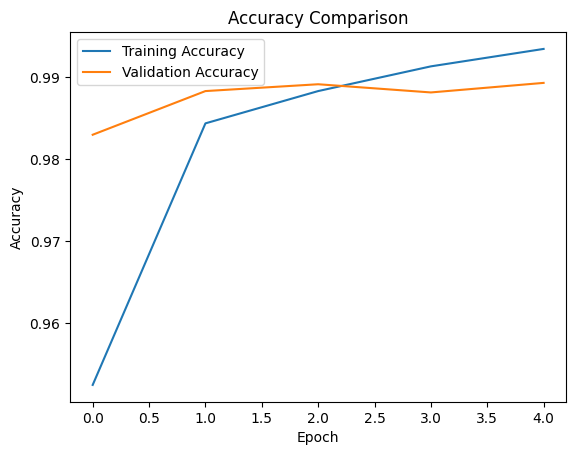

In [5]:
# 📊 Step 5: Visualize Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


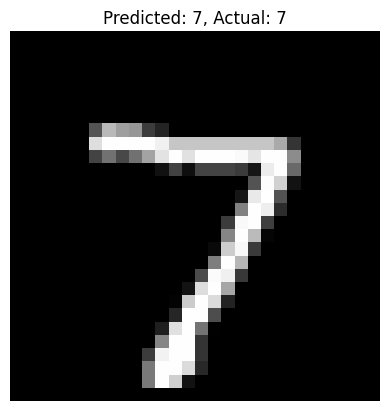

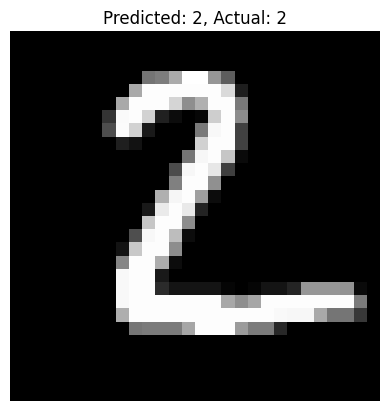

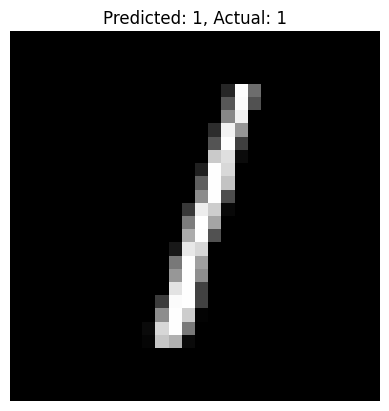

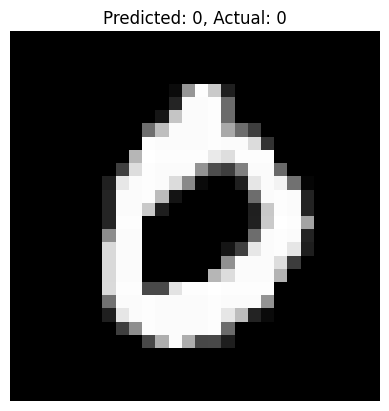

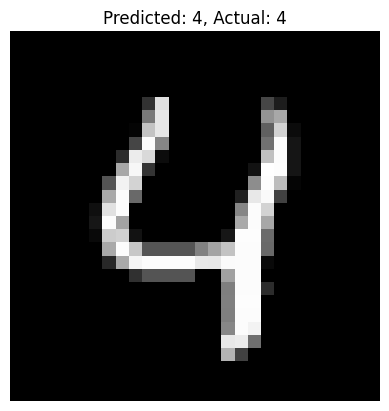

In [6]:
# 🔍 Step 6: Predict on Test Images
import numpy as np

predictions = model.predict(test_X)
predicted_labels = np.argmax(predictions, axis=1)

# Display 5 test images and predictions
for i in range(5):
    plt.imshow(test_X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {test_y[i]}")
    plt.axis('off')
    plt.show()